In [3]:
import numpy as np
import tensorflow as tf

from tensorflow import keras
print(tf.__version__)

print(keras.__version__)
from numpy.random import seed
seed(123)

2.9.1
2.9.0


In [4]:
# Wczytaj dane treningowe i testowe
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

train_set = pd.read_csv('https://raw.githubusercontent.com/przem85/podstawy_sztucznej_inteligencji/main/Dane/adult/adult.data', sep=", ",header = None)
test_set = pd.read_csv('https://raw.githubusercontent.com/przem85/podstawy_sztucznej_inteligencji/main/Dane/adult/adult.test', sep=", ",skiprows = 1, header = None) # Make sure to skip a row for the test set

col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 
              'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
             'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

train = train_set.replace('?', np.nan).dropna()
test = test_set.replace('?', np.nan).dropna()

train_set.head()


/tmp/ipykernel_2500/2985883500.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train_set = pd.read_csv('https://raw.githubusercontent.com/przem85/podstawy_sztucznej_inteligencji/main/Dane/adult/adult.data', sep=", ",header = None)
/tmp/ipykernel_2500/2985883500.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_set = pd.read_csv('https://raw.githubusercontent.com/przem85/podstawy_sztucznej_inteligencji/main/Dane/adult/adult.test', sep=", ",skiprows = 1, header = None) # Make sure to skip a row for the test set


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:




dataset = pd.concat([train,test])

dataset['wage_class'] = dataset.wage_class.replace({'<=50K.': 0,'<=50K':0, '>50K.':1, '>50K':1})

dataset.drop(["fnlwgt"],axis=1,inplace=True)

dataset.drop(["education"],axis=1,inplace=True)

x = dataset.groupby('native_country')["wage_class"].mean()

d = dict(pd.cut(x[x.index!=" United-States"],5,labels=range(5)))

dataset['native_country'] = dataset['native_country'].replace(d)

dataset = pd.get_dummies(dataset,drop_first=True)

train = dataset.iloc[:train.shape[0]]
test = dataset.iloc[train.shape[0]:]

X_train = train.drop("wage_class",axis=1)
y_train = train.wage_class

X_test = test.drop("wage_class",axis=1)
y_test = test.wage_class

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print(X_train.shape)
X_test.shape

(30162, 41)


(15060, 41)

# SGD

In [6]:
from keras.models import Sequential
from keras.layers import Dense

from keras.callbacks import History

history_sgd = History()
model = Sequential()
model.add(Dense(100,activation="sigmoid",input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4200      
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________


2022-05-25 15:01:14.028047: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-05-25 15:01:14.028082: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-05-25 15:01:14.028108: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (hania-dell): /proc/driver/nvidia/version does not exist
2022-05-25 15:01:14.028391: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss="binary_crossentropy",optimizer=sgd, metrics=["accuracy"])

/home/hania/PycharmProjects/PSI_12/venv/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [8]:
model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=100, callbacks=[history_sgd])

Epoch 1/100
943/943 [==============================] - 3s 2ms/step - loss: 0.5366 - accuracy: 0.7514 - val_loss: 0.4454 - val_accuracy: 0.7727
Epoch 2/100
943/943 [==============================] - 4s 4ms/step - loss: 0.3633 - accuracy: 0.8277 - val_loss: 0.3496 - val_accuracy: 0.8315
Epoch 3/100
943/943 [==============================] - 3s 3ms/step - loss: 0.3396 - accuracy: 0.8399 - val_loss: 0.3367 - val_accuracy: 0.8407
Epoch 4/100
943/943 [==============================] - 3s 4ms/step - loss: 0.3341 - accuracy: 0.8436 - val_loss: 0.3315 - val_accuracy: 0.8456
Epoch 5/100
943/943 [==============================] - 3s 3ms/step - loss: 0.3304 - accuracy: 0.8455 - val_loss: 0.3301 - val_accuracy: 0.8472
Epoch 6/100
943/943 [==============================] - 2s 3ms/step - loss: 0.3297 - accuracy: 0.8459 - val_loss: 0.3290 - val_accuracy: 0.8460
Epoch 7/100
943/943 [==============================] - 2s 3ms/step - loss: 0.3279 - accuracy: 0.8462 - val_loss: 0.3285 - val_accuracy: 0.8461

In [9]:
history_sgd.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

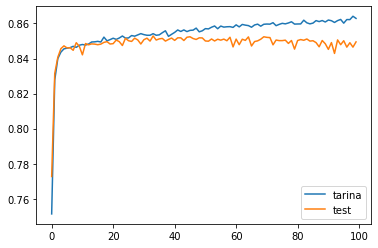

In [10]:
import matplotlib.pyplot as pl
plt.plot(history_sgd.history['accuracy'], label = "tarina")
plt.plot(history_sgd.history['val_accuracy'], label = "test")
plt.legend()
plt.show()

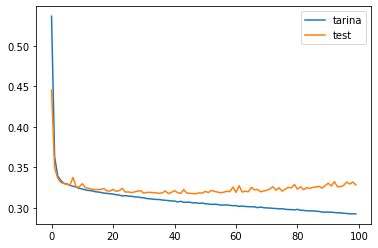

In [11]:
import matplotlib.pyplot as pl
plt.plot(history_sgd.history['loss'], label = "tarina")
plt.plot(history_sgd.history['val_loss'], label = "test")
plt.legend()
plt.show()

# RMSprop

In [12]:
history_RMS = History()

RMS = keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)
model.compile(loss="binary_crossentropy",optimizer=RMS, metrics=["accuracy"])
model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=100, callbacks=[history_RMS])

Epoch 1/100
943/943 [==============================] - 3s 3ms/step - loss: 0.2976 - accuracy: 0.8596 - val_loss: 0.3321 - val_accuracy: 0.8497
Epoch 2/100
943/943 [==============================] - 3s 3ms/step - loss: 0.2977 - accuracy: 0.8613 - val_loss: 0.3350 - val_accuracy: 0.8485
Epoch 3/100
943/943 [==============================] - 3s 3ms/step - loss: 0.2986 - accuracy: 0.8600 - val_loss: 0.3279 - val_accuracy: 0.8481
Epoch 4/100
943/943 [==============================] - 3s 3ms/step - loss: 0.2993 - accuracy: 0.8599 - val_loss: 0.3265 - val_accuracy: 0.8485
Epoch 5/100
943/943 [==============================] - 3s 3ms/step - loss: 0.3001 - accuracy: 0.8589 - val_loss: 0.3292 - val_accuracy: 0.8499
Epoch 6/100
943/943 [==============================] - 2s 3ms/step - loss: 0.3008 - accuracy: 0.8589 - val_loss: 0.3311 - val_accuracy: 0.8461
Epoch 7/100
943/943 [==============================] - 3s 3ms/step - loss: 0.3013 - accuracy: 0.8578 - val_loss: 0.3267 - val_accuracy: 0.8479

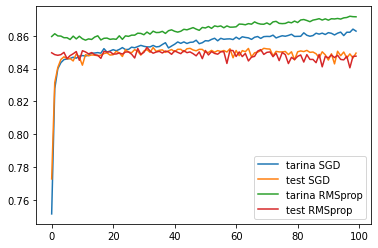

In [13]:
import matplotlib.pyplot as pl
plt.plot(history_sgd.history['accuracy'], label = "tarina SGD")
plt.plot(history_sgd.history['val_accuracy'], label = "test SGD")
plt.plot(history_RMS.history['accuracy'], label = "tarina RMSprop")
plt.plot(history_RMS.history['val_accuracy'], label = "test RMSprop")
plt.legend()
plt.show()

# Adagrad

In [14]:
history_Adagrad = History()

adegrad = keras.optimizers.Adagrad(learning_rate=0.01)
model.compile(loss="binary_crossentropy",optimizer=adegrad, metrics=["accuracy"])
model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=100, callbacks=[history_Adagrad])

Epoch 1/100
943/943 [==============================] - 3s 3ms/step - loss: 0.2722 - accuracy: 0.8748 - val_loss: 0.3392 - val_accuracy: 0.8454
Epoch 2/100
943/943 [==============================] - 2s 2ms/step - loss: 0.2703 - accuracy: 0.8759 - val_loss: 0.3398 - val_accuracy: 0.8465
Epoch 3/100
943/943 [==============================] - 2s 2ms/step - loss: 0.2694 - accuracy: 0.8766 - val_loss: 0.3396 - val_accuracy: 0.8469
Epoch 4/100
943/943 [==============================] - 2s 2ms/step - loss: 0.2687 - accuracy: 0.8765 - val_loss: 0.3394 - val_accuracy: 0.8464
Epoch 5/100
943/943 [==============================] - 2s 2ms/step - loss: 0.2680 - accuracy: 0.8776 - val_loss: 0.3406 - val_accuracy: 0.8464
Epoch 6/100
943/943 [==============================] - 2s 2ms/step - loss: 0.2676 - accuracy: 0.8770 - val_loss: 0.3400 - val_accuracy: 0.8462
Epoch 7/100
943/943 [==============================] - 2s 2ms/step - loss: 0.2671 - accuracy: 0.8772 - val_loss: 0.3413 - val_accuracy: 0.8454

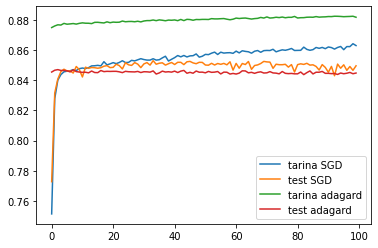

In [15]:
import matplotlib.pyplot as pl
plt.plot(history_sgd.history['accuracy'], label = "tarina SGD")
plt.plot(history_sgd.history['val_accuracy'], label = "test SGD")
plt.plot(history_Adagrad.history['accuracy'], label = "tarina adagard")
plt.plot(history_Adagrad.history['val_accuracy'], label = "test adagard")
plt.legend()
plt.show()

# Adadelta

In [16]:
history_adadelta = History()

adadelta = keras.optimizers.Adadelta(learning_rate=1.0, rho=0.95)
model.compile(loss="binary_crossentropy",optimizer=adadelta, metrics=["accuracy"])
model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=100, callbacks=[history_adadelta])

Epoch 1/100
943/943 [==============================] - 3s 3ms/step - loss: 0.2630 - accuracy: 0.8782 - val_loss: 0.3498 - val_accuracy: 0.8461
Epoch 2/100
943/943 [==============================] - 2s 2ms/step - loss: 0.2619 - accuracy: 0.8779 - val_loss: 0.3554 - val_accuracy: 0.8415
Epoch 3/100
943/943 [==============================] - 2s 2ms/step - loss: 0.2621 - accuracy: 0.8776 - val_loss: 0.3505 - val_accuracy: 0.8450
Epoch 4/100
943/943 [==============================] - 2s 2ms/step - loss: 0.2609 - accuracy: 0.8788 - val_loss: 0.3506 - val_accuracy: 0.8463
Epoch 5/100
943/943 [==============================] - 2s 2ms/step - loss: 0.2609 - accuracy: 0.8780 - val_loss: 0.3554 - val_accuracy: 0.8436
Epoch 6/100
943/943 [==============================] - 2s 2ms/step - loss: 0.2602 - accuracy: 0.8796 - val_loss: 0.3519 - val_accuracy: 0.8454
Epoch 7/100
943/943 [==============================] - 2s 2ms/step - loss: 0.2598 - accuracy: 0.8796 - val_loss: 0.3539 - val_accuracy: 0.8458

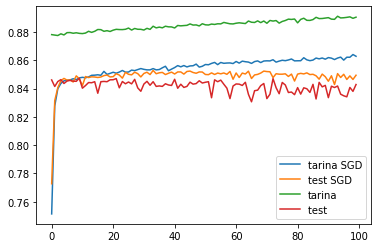

In [17]:
import matplotlib.pyplot as pl
plt.plot(history_sgd.history['accuracy'], label = "tarina SGD")
plt.plot(history_sgd.history['val_accuracy'], label = "test SGD")
plt.plot(history_adadelta.history['accuracy'], label = "tarina")
plt.plot(history_adadelta.history['val_accuracy'], label = "test ")
plt.legend()
plt.show()

# Adam

In [18]:
history_adam1 = History()

adam1 = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss="binary_crossentropy",optimizer=adam1, metrics=["accuracy"])
model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=100, callbacks=[history_adam1])

Epoch 1/100
943/943 [==============================] - 3s 3ms/step - loss: 0.2374 - accuracy: 0.8882 - val_loss: 0.4275 - val_accuracy: 0.8332
Epoch 2/100
943/943 [==============================] - 2s 3ms/step - loss: 0.2351 - accuracy: 0.8890 - val_loss: 0.4225 - val_accuracy: 0.8410
Epoch 3/100
943/943 [==============================] - 3s 3ms/step - loss: 0.2337 - accuracy: 0.8908 - val_loss: 0.4190 - val_accuracy: 0.8406
Epoch 4/100
943/943 [==============================] - 3s 3ms/step - loss: 0.2316 - accuracy: 0.8909 - val_loss: 0.4317 - val_accuracy: 0.8289
Epoch 5/100
943/943 [==============================] - 3s 3ms/step - loss: 0.2311 - accuracy: 0.8903 - val_loss: 0.4275 - val_accuracy: 0.8435
Epoch 6/100
943/943 [==============================] - 3s 3ms/step - loss: 0.2296 - accuracy: 0.8911 - val_loss: 0.4278 - val_accuracy: 0.8345
Epoch 7/100
943/943 [==============================] - 3s 3ms/step - loss: 0.2281 - accuracy: 0.8920 - val_loss: 0.4276 - val_accuracy: 0.8375

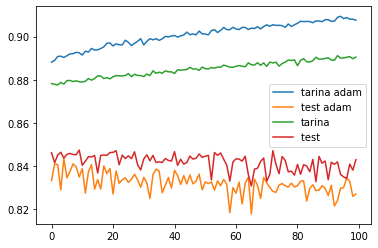

In [19]:
import matplotlib.pyplot as pl
plt.plot(history_adam1.history['accuracy'], label = "tarina adam")
plt.plot(history_adam1.history['val_accuracy'], label = "test adam")
plt.plot(history_adadelta.history['accuracy'], label = "tarina")
plt.plot(history_adadelta.history['val_accuracy'], label = "test ")
plt.legend()
plt.show()

# Adam

In [20]:
history_adam2 = History()

adam2 = keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss="binary_crossentropy",optimizer=adam2, metrics=["accuracy"])
model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=100, callbacks=[history_adam2])

Epoch 1/100
943/943 [==============================] - 3s 3ms/step - loss: 0.1792 - accuracy: 0.9132 - val_loss: 0.5513 - val_accuracy: 0.8289
Epoch 2/100
943/943 [==============================] - 3s 3ms/step - loss: 0.1774 - accuracy: 0.9152 - val_loss: 0.5529 - val_accuracy: 0.8278
Epoch 3/100
943/943 [==============================] - 3s 3ms/step - loss: 0.1768 - accuracy: 0.9155 - val_loss: 0.5538 - val_accuracy: 0.8282
Epoch 4/100
943/943 [==============================] - 3s 3ms/step - loss: 0.1767 - accuracy: 0.9153 - val_loss: 0.5557 - val_accuracy: 0.8286
Epoch 5/100
943/943 [==============================] - 3s 3ms/step - loss: 0.1764 - accuracy: 0.9155 - val_loss: 0.5562 - val_accuracy: 0.8263
Epoch 6/100
943/943 [==============================] - 3s 3ms/step - loss: 0.1762 - accuracy: 0.9158 - val_loss: 0.5579 - val_accuracy: 0.8282
Epoch 7/100
943/943 [==============================] - 3s 3ms/step - loss: 0.1760 - accuracy: 0.9159 - val_loss: 0.5560 - val_accuracy: 0.8295

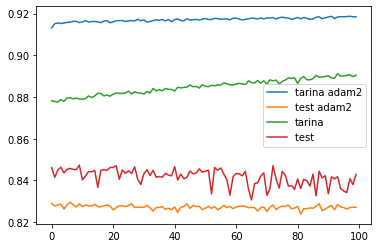

In [21]:
import matplotlib.pyplot as pl
plt.plot(history_adam2.history['accuracy'], label = "tarina adam2")
plt.plot(history_adam2.history['val_accuracy'], label = "test adam2")
plt.plot(history_adadelta.history['accuracy'], label = "tarina")
plt.plot(history_adadelta.history['val_accuracy'], label = "test ")
plt.legend()
plt.show()